In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

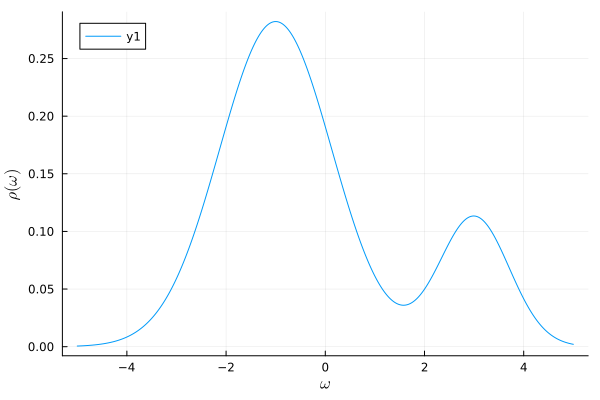

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
f64_input_smpl = ComplexF64.(input_smpl)
f64_input_gw   = ComplexF64.(input_gw)
;

In [7]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [8]:
#construct solver struct
@time sol     = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
@time f64_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     1.394068e-01     1.354674e+00
 * time: 0.025495052337646484
     1     1.271921e-01     8.719071e-01
 * time: 1.4075510501861572
     2     9.446336e-02     9.728176e-01
 * time: 1.6953339576721191
     3     4.352172e-02     1.124699e+00
 * time: 2.0051119327545166
     4     3.614140e-02     6.164562e-02
 * time: 2.184587001800537
     5     3.610852e-02     1.054229e-02
 * time: 2.5355489253997803
     6     3.610750e-02     1.921777e-03
 * time: 2.8625059127807617
     7     3.610748e-02     1.512958e-04
 * time: 3.102365016937256
     8     3.610748e-02     2.197711e-05
 * time: 3.4391748905181885
     9     3.610748e-02     4.523937e-06
 * time: 3.695596933364868
    10     3.610748e-02     6.640354e-07
 * time: 3.8815128803253174
    11     3.610748e-02     1.213906e-07
 * time: 4.212245941162109
    12     3.610748e-02     1.825283e-08
 * time: 4.447336912155151
    13     3.610748e-02     3.485925e-

In [9]:
#execute optimize
@time Nevanlinna.solve!(sol)
@time Nevanlinna.solve!(f64_sol)

H=1
Iter     Function value   Gradient norm 
     0     3.610748e-02     3.485925e-09
 * time: 5.507469177246094e-5
max_theta=0.07656815618787277843167094722571857204341
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.610748e-02     4.607507e-01
 * time: 0.0002658367156982422
     1     3.458019e-02     3.832203e-01
 * time: 0.2318568229675293
     2     2.842299e-02     3.094581e-01
 * time: 0.9651057720184326
     3     2.588584e-02     2.989854e-01
 * time: 1.2326719760894775
     4     1.616310e-02     6.775993e-01
 * time: 1.4567790031433105
     5     1.152500e-02     1.850161e-01
 * time: 1.6741960048675537
     6     1.100075e-02     6.844742e-02
 * time: 1.998396873474121
     7     1.081305e-02     3.099662e-02
 * time: 2.3300108909606934
     8     1.079639e-02     1.175092e-02
 * time: 2.6512858867645264
     9     1.079535e-02     3.198604e-03
 * time: 2.976188898086548
    10     1.079526e-02     9.616927e-04
 * time: 3.1855537891

     8     3.541879e-04     1.202338e-02
 * time: 2.7071290016174316
     9     3.317255e-04     1.335290e-02
 * time: 3.18270206451416
    10     2.745317e-04     3.095028e-02
 * time: 3.6755568981170654
    11     2.227564e-04     1.468464e-02
 * time: 4.183945894241333
    12     2.109885e-04     1.550989e-02
 * time: 4.704732894897461
    13     1.980827e-04     7.102639e-03
 * time: 5.224809885025024
    14     1.965369e-04     5.610650e-03
 * time: 5.738959074020386
    15     1.949621e-04     7.294491e-03
 * time: 6.316577911376953
    16     1.938476e-04     9.328859e-03
 * time: 6.840036869049072
    17     1.909921e-04     1.423532e-02
 * time: 7.375532865524292
    18     1.885461e-04     9.508340e-03
 * time: 7.910076856613159
    19     1.872132e-04     2.752278e-03
 * time: 8.411185026168823
    20     1.869741e-04     2.491821e-03
 * time: 8.792728900909424
    21     1.868090e-04     2.037686e-03
 * time: 9.41820502281189
    22     1.863064e-04     6.669543e-03
 * time

    31     3.658214e-05     1.812335e-03
 * time: 17.889955043792725
    32     3.654232e-05     1.097643e-03
 * time: 18.5087890625
    33     3.653096e-05     2.957180e-04
 * time: 18.9378399848938
    34     3.652719e-05     2.805534e-04
 * time: 19.53678011894226
    35     3.652305e-05     5.900462e-04
 * time: 20.16473913192749
    36     3.651569e-05     8.711236e-04
 * time: 20.76597809791565
    37     3.650492e-05     1.293413e-03
 * time: 21.669705152511597
    38     3.648455e-05     1.906224e-03
 * time: 22.374392986297607
    39     3.645302e-05     2.601490e-03
 * time: 23.211148977279663
    40     3.639626e-05     3.719350e-03
 * time: 24.10070514678955
    41     3.631136e-05     4.815348e-03
 * time: 24.677659034729004
    42     3.615692e-05     6.426831e-03
 * time: 25.29088306427002
    43     3.593308e-05     7.807435e-03
 * time: 25.89517116546631
    44     3.552534e-05     9.436206e-03
 * time: 26.49014115333557
    45     3.493243e-05     9.758930e-03
 * time

     9     2.049205e-05     9.475907e-04
 * time: 4.360685110092163
    10     2.041267e-05     9.157819e-04
 * time: 4.806217193603516
    11     2.028044e-05     1.894858e-03
 * time: 5.224512100219727
    12     2.014403e-05     3.936039e-04
 * time: 5.679854154586792
    13     2.007649e-05     3.635523e-04
 * time: 6.174021005630493
    14     1.964882e-05     1.439704e-03
 * time: 6.815571069717407
    15     1.943455e-05     9.431024e-04
 * time: 7.495511054992676
    16     1.939733e-05     1.213223e-03
 * time: 8.149362087249756
    17     1.933880e-05     1.621055e-03
 * time: 8.823018074035645
    18     1.930072e-05     1.421333e-03
 * time: 9.292659044265747
    19     1.924451e-05     1.385487e-03
 * time: 10.032158136367798
    20     1.912405e-05     1.414850e-03
 * time: 10.684176206588745
    21     1.893356e-05     1.600937e-03
 * time: 11.336825132369995
    22     1.889515e-05     1.630658e-03
 * time: 11.772525072097778
    23     1.883638e-05     1.723667e-03
 * 

    36     1.527848e-05     1.197263e-03
 * time: 21.73590588569641
    37     1.524659e-05     6.751943e-04
 * time: 22.449874877929688
    38     1.522920e-05     7.725710e-04
 * time: 23.141028881072998
    39     1.522322e-05     4.196670e-04
 * time: 23.654603004455566
    40     1.521540e-05     7.674339e-04
 * time: 24.408096075057983
    41     1.520692e-05     1.011915e-03
 * time: 25.091184854507446
    42     1.518741e-05     1.503984e-03
 * time: 25.8182430267334
    43     1.517102e-05     1.688040e-03
 * time: 26.52085590362549
    44     1.513837e-05     2.069853e-03
 * time: 27.19722604751587
    45     1.510116e-05     1.883023e-03
 * time: 27.99241304397583
    46     1.503281e-05     1.042922e-03
 * time: 28.73218584060669
    47     1.502340e-05     3.368159e-04
 * time: 29.194143056869507
    48     1.501709e-05     2.350737e-04
 * time: 29.966080904006958
    49     1.501422e-05     4.183694e-04
 * time: 30.836654901504517
    50     1.500889e-05     6.389181e-04


    40     1.397075e-05     3.284476e-04
 * time: 25.43272089958191
    41     1.396859e-05     2.591130e-04
 * time: 25.94925594329834
    42     1.396712e-05     3.592539e-04
 * time: 26.693322896957397
    43     1.396435e-05     5.108087e-04
 * time: 27.430696964263916
    44     1.396175e-05     5.554530e-04
 * time: 28.207587957382202
    45     1.395835e-05     6.025578e-04
 * time: 28.943163871765137
    46     1.395248e-05     5.203944e-04
 * time: 29.82190990447998
    47     1.394115e-05     3.852731e-04
 * time: 30.587959051132202
    48     1.393927e-05     2.418871e-04
 * time: 31.10694694519043
    49     1.393680e-05     3.056264e-04
 * time: 31.810050010681152
    50     1.393469e-05     5.252264e-04
 * time: 32.57409691810608
    51     1.393008e-05     7.112393e-04
 * time: 33.31584095954895
    52     1.392604e-05     8.070898e-04
 * time: 33.820854902267456
    53     1.392016e-05     9.472170e-04
 * time: 34.51871085166931
    54     1.391387e-05     9.870620e-04


    13     1.352956e-05     1.802099e-04
 * time: 6.886399984359741
    14     1.352575e-05     2.803441e-04
 * time: 7.495723009109497
    15     1.352274e-05     2.564498e-04
 * time: 8.03949499130249
    16     1.351968e-05     1.785797e-04
 * time: 8.513772010803223
    17     1.351629e-05     2.453955e-04
 * time: 9.034731149673462
    18     1.351057e-05     1.904613e-04
 * time: 9.56477403640747
    19     1.350757e-05     3.356233e-04
 * time: 10.394607067108154
    20     1.350570e-05     1.769048e-04
 * time: 10.929627180099487
    21     1.349484e-05     4.125885e-04
 * time: 11.999104022979736
    22     1.349064e-05     4.233663e-04
 * time: 12.793519020080566
    23     1.348636e-05     3.261924e-04
 * time: 13.582003116607666
    24     1.347817e-05     2.822121e-04
 * time: 14.379960060119629
    25     1.347551e-05     1.590766e-04
 * time: 15.16261601448059
    26     1.347198e-05     4.028161e-04
 * time: 15.900525093078613
    27     1.346879e-05     3.316796e-04
 *

   134     1.331477e-05     2.040730e-04
 * time: 85.6473331451416
   135     1.331471e-05     2.229314e-04
 * time: 86.20710802078247
   136     1.331463e-05     2.478274e-04
 * time: 86.75626611709595
   137     1.331454e-05     2.706687e-04
 * time: 87.30639505386353
   138     1.331443e-05     3.003322e-04
 * time: 87.84659600257874
   139     1.331431e-05     3.280445e-04
 * time: 88.42887902259827
   140     1.331415e-05     3.633313e-04
 * time: 88.91373300552368
   141     1.331397e-05     3.970275e-04
 * time: 89.43858909606934
   142     1.331373e-05     4.388946e-04
 * time: 89.95574498176575
   143     1.331346e-05     4.799556e-04
 * time: 90.4945809841156
   144     1.331311e-05     5.294287e-04
 * time: 91.0476770401001
   145     1.331270e-05     5.795795e-04
 * time: 91.58961796760559
   146     1.331217e-05     6.376482e-04
 * time: 92.32651209831238
   147     1.331155e-05     6.990167e-04
 * time: 92.85472106933594
   148     1.331073e-05     7.662544e-04
 * time: 9

    75     1.322079e-05     2.343852e-04
 * time: 53.54787802696228
    76     1.322064e-05     2.531968e-04
 * time: 54.10856318473816
    77     1.322044e-05     2.925873e-04
 * time: 54.96883296966553
    78     1.322024e-05     3.152398e-04
 * time: 55.53527808189392
    79     1.321996e-05     3.565849e-04
 * time: 56.383814096450806
    80     1.321968e-05     3.827598e-04
 * time: 56.915340185165405
    81     1.321927e-05     4.224109e-04
 * time: 57.70988607406616
    82     1.321882e-05     4.505786e-04
 * time: 58.693756103515625
    83     1.321806e-05     4.762274e-04
 * time: 59.57113695144653
    84     1.321671e-05     4.650127e-04
 * time: 60.516913175582886
    85     1.321214e-05     3.006020e-04
 * time: 61.688472032547
    86     1.321133e-05     1.592332e-04
 * time: 62.25094199180603
    87     1.321069e-05     1.085457e-04
 * time: 62.782459020614624
    88     1.321061e-05     6.114041e-05
 * time: 63.328449964523315
    89     1.321053e-05     6.049279e-05
 * 

   195     1.316435e-05     6.806489e-04
 * time: 129.02348709106445
   196     1.316276e-05     7.263416e-04
 * time: 129.882826089859
   197     1.315924e-05     6.778591e-04
 * time: 130.64963507652283
   198     1.314777e-05     4.269559e-04
 * time: 131.73811602592468
   199     1.314659e-05     1.200556e-04
 * time: 132.29143595695496
   200     1.314609e-05     7.122863e-05
 * time: 133.1157569885254
   201     1.314598e-05     7.348155e-05
 * time: 133.96029901504517
   202     1.314594e-05     2.624686e-05
 * time: 134.57301998138428
   203     1.314593e-05     1.832132e-05
 * time: 135.42301607131958
   204     1.314593e-05     1.100307e-05
 * time: 135.92123699188232
   205     1.314592e-05     1.019929e-05
 * time: 136.80778908729553
   206     1.314592e-05     3.977719e-06
 * time: 137.36587810516357
   207     1.314592e-05     4.027910e-06
 * time: 138.20235395431519
   208     1.314592e-05     2.101566e-06
 * time: 138.76406598091125
   209     1.314592e-05     1.760010e

    92     1.312776e-05     1.701460e-04
 * time: 68.6366400718689
    93     1.312755e-05     2.305307e-04
 * time: 69.52199912071228
    94     1.312742e-05     2.214947e-04
 * time: 70.06204509735107
    95     1.312708e-05     2.918612e-04
 * time: 70.93489599227905
    96     1.312686e-05     2.778952e-04
 * time: 71.4967041015625
    97     1.312622e-05     2.858309e-04
 * time: 72.3615050315857
    98     1.312507e-05     2.550725e-04
 * time: 73.21475601196289
    99     1.312407e-05     3.066951e-04
 * time: 74.08856201171875
   100     1.312360e-05     1.249160e-04
 * time: 74.67251992225647
   101     1.312344e-05     7.600180e-05
 * time: 75.57460594177246
   102     1.312340e-05     4.467923e-05
 * time: 76.16019296646118
   103     1.312336e-05     4.203932e-05
 * time: 76.99021601676941
   104     1.312335e-05     1.650231e-05
 * time: 77.55250811576843
   105     1.312334e-05     1.824340e-05
 * time: 78.40932011604309
   106     1.312334e-05     9.351868e-06
 * time: 7

   212     1.309375e-05     5.597397e-06
 * time: 157.6799440383911
   213     1.309375e-05     2.758212e-06
 * time: 158.24854111671448
   214     1.309375e-05     2.752495e-06
 * time: 159.0841429233551
   215     1.309375e-05     1.170310e-06
 * time: 159.72461199760437
   216     1.309375e-05     1.114928e-06
 * time: 160.6881070137024
   217     1.309375e-05     5.643745e-07
 * time: 161.4211940765381
   218     1.309375e-05     4.971916e-07
 * time: 162.57045912742615
   219     1.309375e-05     2.463509e-07
 * time: 163.35565209388733
   220     1.309375e-05     2.435417e-07
 * time: 164.28647208213806
   221     1.309375e-05     9.971710e-08
 * time: 164.97259211540222
   222     1.309375e-05     1.045631e-07
 * time: 165.90734314918518
   223     1.309375e-05     5.728907e-08
 * time: 166.50597095489502
   224     1.309375e-05     4.315268e-08
 * time: 167.40415596961975
   225     1.309375e-05     2.302902e-08
 * time: 167.97797393798828
   226     1.309375e-05     2.085744e-

   102     1.308527e-05     1.180441e-05
 * time: 82.46232509613037
   103     1.308527e-05     2.049975e-05
 * time: 83.46412396430969
   104     1.308527e-05     1.826964e-05
 * time: 84.1363570690155
   105     1.308526e-05     2.813772e-05
 * time: 85.0821840763092
   106     1.308526e-05     2.551748e-05
 * time: 85.79050707817078
   107     1.308525e-05     3.648168e-05
 * time: 86.81605291366577
   108     1.308525e-05     3.359561e-05
 * time: 87.47230696678162
   109     1.308524e-05     4.882841e-05
 * time: 88.40043687820435
   110     1.308524e-05     4.658370e-05
 * time: 89.00415086746216
   111     1.308522e-05     6.163459e-05
 * time: 89.96537709236145
   112     1.308521e-05     5.847268e-05
 * time: 90.67546796798706
   113     1.308519e-05     7.724466e-05
 * time: 91.61992907524109
   114     1.308518e-05     7.447997e-05
 * time: 92.23387289047241
   115     1.308515e-05     9.772820e-05
 * time: 93.10004591941833
   116     1.308513e-05     9.536738e-05
 * time: 

   222     1.307399e-05     1.620456e-05
 * time: 181.313796043396
   223     1.307399e-05     2.221580e-05
 * time: 182.20121598243713
   224     1.307399e-05     2.128116e-05
 * time: 182.8351550102234
   225     1.307399e-05     2.698294e-05
 * time: 183.7300488948822
   226     1.307398e-05     2.581523e-05
 * time: 184.33998894691467
   227     1.307398e-05     3.595795e-05
 * time: 185.22893905639648
   228     1.307398e-05     3.454598e-05
 * time: 185.82266187667847
   229     1.307397e-05     4.492250e-05
 * time: 186.78112888336182
   230     1.307397e-05     4.306281e-05
 * time: 187.40740299224854
   231     1.307395e-05     5.649378e-05
 * time: 188.35734796524048
   232     1.307395e-05     5.431950e-05
 * time: 188.99981904029846
   233     1.307393e-05     7.561527e-05
 * time: 189.97030997276306
   234     1.307392e-05     7.345250e-05
 * time: 190.59924387931824
   235     1.307389e-05     8.967442e-05
 * time: 191.56484198570251
   236     1.307387e-05     8.554847e-

    57     1.306323e-05     4.954227e-05
 * time: 51.428624868392944
    58     1.306313e-05     3.911098e-05
 * time: 52.82083797454834
    59     1.306306e-05     1.320667e-05
 * time: 53.97999882698059
    60     1.306305e-05     3.875931e-05
 * time: 54.67270493507385
    61     1.306302e-05     3.361623e-05
 * time: 55.71063780784607
    62     1.306292e-05     3.480145e-05
 * time: 57.122827768325806
    63     1.306289e-05     2.498460e-05
 * time: 58.3237829208374
    64     1.306288e-05     2.022795e-05
 * time: 59.54148578643799
    65     1.306286e-05     4.946696e-05
 * time: 60.78740978240967
    66     1.306284e-05     1.571782e-05
 * time: 61.55520582199097
    67     1.306281e-05     5.029930e-05
 * time: 62.36034178733826
    68     1.306279e-05     1.487876e-05
 * time: 63.18862199783325
    69     1.306277e-05     4.816711e-05
 * time: 63.87632393836975
    70     1.306275e-05     2.803530e-05
 * time: 64.49923896789551
    71     1.306273e-05     5.156602e-05
 * tim

   177     1.305962e-05     1.863272e-06
 * time: 153.15791583061218
   178     1.305962e-05     1.233876e-06
 * time: 153.79818487167358
   179     1.305962e-05     1.811066e-06
 * time: 154.44699096679688
   180     1.305962e-05     1.553037e-06
 * time: 155.13012099266052
   181     1.305962e-05     2.134712e-06
 * time: 155.86502599716187
   182     1.305962e-05     2.081918e-06
 * time: 156.51581192016602
   183     1.305962e-05     2.665818e-06
 * time: 157.16053986549377
   184     1.305962e-05     2.713054e-06
 * time: 157.82827877998352
   185     1.305962e-05     3.341308e-06
 * time: 158.48139476776123
   186     1.305962e-05     3.415046e-06
 * time: 159.12063479423523
   187     1.305962e-05     4.088928e-06
 * time: 159.75729894638062
   188     1.305962e-05     4.193590e-06
 * time: 160.39053678512573
   189     1.305962e-05     4.897569e-06
 * time: 161.03012681007385
   190     1.305962e-05     5.063953e-06
 * time: 161.6701397895813
   191     1.305962e-05     5.77011

   297     1.305811e-05     2.928456e-04
 * time: 234.32559299468994
   298     1.305658e-05     2.222213e-04
 * time: 235.67882990837097
   299     1.305565e-05     2.733674e-04
 * time: 236.34614086151123
   300     1.305483e-05     1.647224e-04
 * time: 237.06163787841797
   301     1.305436e-05     1.383623e-04
 * time: 237.7344479560852
   302     1.305417e-05     9.340900e-05
 * time: 238.46561884880066
   303     1.305407e-05     8.306682e-05
 * time: 239.17072677612305
   304     1.305400e-05     6.160462e-05
 * time: 239.86110496520996
   305     1.305395e-05     5.641302e-05
 * time: 240.49592280387878
   306     1.305392e-05     3.417518e-05
 * time: 241.1284317970276
   307     1.305390e-05     3.185280e-05
 * time: 241.99845385551453
   308     1.305390e-05     2.080533e-05
 * time: 242.71771788597107
   309     1.305389e-05     2.069106e-05
 * time: 243.39804077148438
   310     1.305388e-05     1.384260e-05
 * time: 244.02044486999512
   311     1.305388e-05     1.233365

   417     1.305388e-05     1.995997e-05
 * time: 316.3133637905121
   418     1.305388e-05     2.036658e-05
 * time: 316.93145990371704
   419     1.305388e-05     2.132372e-05
 * time: 317.55185294151306
   420     1.305387e-05     2.175814e-05
 * time: 318.21109676361084
   421     1.305387e-05     2.277456e-05
 * time: 318.8712577819824
   422     1.305387e-05     2.323870e-05
 * time: 319.51466178894043
   423     1.305387e-05     2.431797e-05
 * time: 320.1567687988281
   424     1.305387e-05     2.481391e-05
 * time: 320.8024618625641
   425     1.305387e-05     2.595981e-05
 * time: 321.4467067718506
   426     1.305387e-05     2.648976e-05
 * time: 322.1998097896576
   427     1.305387e-05     2.770627e-05
 * time: 322.9565439224243
   428     1.305387e-05     2.827264e-05
 * time: 323.632474899292
   429     1.305387e-05     2.956395e-05
 * time: 324.27014780044556
   430     1.305387e-05     3.016930e-05
 * time: 324.8930838108063
   431     1.305387e-05     3.153984e-05
 * 

     0     1.304841e-05     3.824365e-05
 * time: 0.00023102760314941406
     1     1.304841e-05     3.741663e-05
 * time: 0.7527768611907959
     2     1.304840e-05     2.949454e-05
 * time: 1.9301860332489014
     3     1.304840e-05     2.273784e-05
 * time: 3.1319539546966553
     4     1.304839e-05     1.949867e-05
 * time: 4.337404012680054
     5     1.304839e-05     1.630653e-05
 * time: 5.049906015396118
     6     1.304838e-05     1.821169e-05
 * time: 5.793741941452026
     7     1.304837e-05     2.018396e-05
 * time: 6.662184000015259
     8     1.304836e-05     2.112701e-05
 * time: 7.395704984664917
     9     1.304835e-05     2.255726e-05
 * time: 8.079814910888672
    10     1.304833e-05     1.686104e-05
 * time: 9.05203104019165
    11     1.304831e-05     1.763947e-05
 * time: 9.892266988754272
    12     1.304828e-05     1.450635e-05
 * time: 10.667058944702148
    13     1.304825e-05     1.216156e-05
 * time: 11.331057071685791
    14     1.304822e-05     1.133367e-0

   121     1.304404e-05     1.170605e-05
 * time: 111.3791298866272
   122     1.304404e-05     2.816059e-05
 * time: 112.3931770324707
   123     1.304404e-05     1.776231e-05
 * time: 113.06734204292297
   124     1.304403e-05     3.350124e-05
 * time: 114.07742500305176
   125     1.304402e-05     2.421887e-05
 * time: 114.72316193580627
   126     1.304402e-05     3.929825e-05
 * time: 115.72110199928284
   127     1.304401e-05     3.103439e-05
 * time: 116.39817500114441
   128     1.304400e-05     4.651122e-05
 * time: 117.38041090965271
   129     1.304400e-05     3.855532e-05
 * time: 118.02163600921631
   130     1.304399e-05     5.350601e-05
 * time: 119.0190269947052
   131     1.304398e-05     4.616303e-05
 * time: 119.67426085472107
   132     1.304397e-05     6.120734e-05
 * time: 120.64950108528137
   133     1.304396e-05     5.445867e-05
 * time: 121.3229820728302
   134     1.304394e-05     6.853939e-05
 * time: 122.28711104393005
   135     1.304393e-05     6.222999e-

   241     1.304149e-05     4.177668e-06
 * time: 215.5735170841217
   242     1.304149e-05     5.134241e-06
 * time: 216.579509973526
   243     1.304149e-05     4.916157e-06
 * time: 217.2619218826294
   244     1.304149e-05     5.890392e-06
 * time: 218.35961198806763
   245     1.304149e-05     5.673744e-06
 * time: 219.17041397094727
   246     1.304149e-05     6.684722e-06
 * time: 220.19723296165466
   247     1.304149e-05     6.462955e-06
 * time: 220.90182995796204
   248     1.304149e-05     7.539240e-06
 * time: 221.9372420310974
   249     1.304149e-05     7.313895e-06
 * time: 222.6646978855133
   250     1.304149e-05     8.484471e-06
 * time: 223.65418195724487
   251     1.304149e-05     8.267887e-06
 * time: 224.3422338962555
   252     1.304149e-05     9.520028e-06
 * time: 225.40065908432007
   253     1.304149e-05     9.315246e-06
 * time: 226.0470268726349
   254     1.304149e-05     1.062679e-05
 * time: 227.1178069114685
   255     1.304149e-05     1.041797e-05
 *

   361     1.303660e-05     4.801939e-07
 * time: 318.0741939544678
   362     1.303660e-05     4.431807e-07
 * time: 318.7511019706726
   363     1.303660e-05     3.371991e-07
 * time: 319.49867606163025
   364     1.303660e-05     3.021647e-07
 * time: 320.2539920806885
   365     1.303660e-05     2.260797e-07
 * time: 320.96259593963623
   366     1.303660e-05     2.115593e-07
 * time: 321.63269090652466
   367     1.303660e-05     1.452484e-07
 * time: 322.30132389068604
   368     1.303660e-05     1.708560e-07
 * time: 323.02554392814636
   369     1.303660e-05     1.133393e-07
 * time: 323.72602105140686
   370     1.303660e-05     1.621760e-07
 * time: 324.4870939254761
   371     1.303660e-05     1.191105e-07
 * time: 325.2634119987488
   372     1.303660e-05     1.713631e-07
 * time: 325.9586670398712
   373     1.303660e-05     1.502252e-07
 * time: 326.61810207366943
   374     1.303660e-05     1.980185e-07
 * time: 327.3402180671692
   375     1.303660e-05     1.935056e-07


   481     1.303660e-05     1.002536e-05
 * time: 402.534991979599
   482     1.303660e-05     1.033013e-05
 * time: 403.2256979942322
   483     1.303660e-05     1.049358e-05
 * time: 403.9454960823059
   484     1.303660e-05     1.081108e-05
 * time: 404.6405758857727
   485     1.303660e-05     1.098143e-05
 * time: 405.38176703453064
   486     1.303660e-05     1.131222e-05
 * time: 406.0781559944153
   487     1.303660e-05     1.148974e-05
 * time: 406.80294394493103
   488     1.303660e-05     1.183437e-05
 * time: 407.53612303733826
   489     1.303660e-05     1.201934e-05
 * time: 408.25192189216614
   490     1.303660e-05     1.237839e-05
 * time: 408.9827618598938
   491     1.303660e-05     1.257111e-05
 * time: 409.7328140735626
   492     1.303660e-05     1.294519e-05
 * time: 410.42410802841187
   493     1.303660e-05     1.314596e-05
 * time: 411.17888498306274
   494     1.303660e-05     1.353572e-05
 * time: 411.8718159198761
   495     1.303660e-05     1.374485e-05
 *

   601     1.303648e-05     1.258520e-04
 * time: 496.30522990226746
   602     1.303648e-05     1.295079e-04
 * time: 497.29890298843384
   603     1.303647e-05     1.309589e-04
 * time: 498.3725919723511
   604     1.303647e-05     1.347788e-04
 * time: 499.25535798072815
   605     1.303646e-05     1.362664e-04
 * time: 500.0983679294586
   606     1.303646e-05     1.402592e-04
 * time: 500.9734089374542
   607     1.303645e-05     1.417826e-04
 * time: 501.75913190841675
   608     1.303644e-05     1.459578e-04
 * time: 502.53515696525574
   609     1.303644e-05     1.475162e-04
 * time: 503.30845403671265
   610     1.303643e-05     1.518844e-04
 * time: 504.0989120006561
   611     1.303642e-05     1.534762e-04
 * time: 504.9071340560913
   612     1.303641e-05     1.580490e-04
 * time: 505.66152906417847
   613     1.303641e-05     1.596726e-04
 * time: 506.4169590473175
   614     1.303640e-05     1.644627e-04
 * time: 507.1847870349884
   615     1.303639e-05     1.661156e-04


    31     1.303000e-05     2.318869e-05
 * time: 25.635623931884766
    32     1.302995e-05     3.294728e-05
 * time: 26.75080394744873
    33     1.302987e-05     2.731113e-05
 * time: 27.80933690071106
    34     1.302979e-05     2.092805e-05
 * time: 28.937493085861206
    35     1.302975e-05     2.296561e-05
 * time: 29.976967096328735
    36     1.302967e-05     2.170751e-05
 * time: 31.866663932800293
    37     1.302965e-05     1.577373e-05
 * time: 33.271080017089844
    38     1.302962e-05     4.093998e-05
 * time: 34.534728050231934
    39     1.302958e-05     1.430801e-05
 * time: 35.75329089164734
    40     1.302956e-05     2.210596e-05
 * time: 37.03963804244995
    41     1.302955e-05     1.249306e-05
 * time: 38.305546045303345
    42     1.302952e-05     1.492906e-05
 * time: 39.92262506484985
    43     1.302948e-05     3.378482e-05
 * time: 41.17654299736023
    44     1.302946e-05     1.772463e-05
 * time: 42.40639591217041
    45     1.302944e-05     7.705679e-06


   151     1.302837e-05     2.121276e-05
 * time: 154.85580897331238
   152     1.302837e-05     2.209408e-05
 * time: 155.5657570362091
   153     1.302837e-05     2.333448e-05
 * time: 156.27694988250732
   154     1.302837e-05     2.438580e-05
 * time: 157.00073790550232
   155     1.302837e-05     2.556091e-05
 * time: 157.72495007514954
   156     1.302837e-05     2.679958e-05
 * time: 158.5838749408722
   157     1.302837e-05     2.791826e-05
 * time: 159.53729009628296
   158     1.302836e-05     2.930507e-05
 * time: 160.51559400558472
   159     1.302836e-05     3.037446e-05
 * time: 161.42672300338745
   160     1.302836e-05     3.187867e-05
 * time: 162.41602396965027
   161     1.302836e-05     3.289096e-05
 * time: 163.5825638771057
   162     1.302836e-05     3.450971e-05
 * time: 164.70656204223633
   163     1.302836e-05     3.546745e-05
 * time: 165.85176801681519
   164     1.302836e-05     3.722568e-05
 * time: 166.71915197372437
   165     1.302835e-05     3.813265e

   271     1.302779e-05     1.849828e-05
 * time: 247.66572093963623
   272     1.302779e-05     1.881751e-05
 * time: 248.4089150428772
   273     1.302779e-05     1.938313e-05
 * time: 249.13289403915405
   274     1.302779e-05     1.971292e-05
 * time: 249.8559489250183
   275     1.302779e-05     2.029564e-05
 * time: 250.62132501602173
   276     1.302779e-05     2.063605e-05
 * time: 251.31019592285156
   277     1.302779e-05     2.123674e-05
 * time: 252.0568881034851
   278     1.302779e-05     2.158801e-05
 * time: 253.1304590702057
   279     1.302779e-05     2.220747e-05
 * time: 254.25510787963867
   280     1.302779e-05     2.256999e-05
 * time: 255.2922511100769
   281     1.302779e-05     2.320896e-05
 * time: 256.32036209106445
   282     1.302779e-05     2.358307e-05
 * time: 257.59924697875977
   283     1.302779e-05     2.424235e-05
 * time: 258.83688592910767
   284     1.302779e-05     2.462830e-05
 * time: 259.70074009895325
   285     1.302779e-05     2.530878e-0

   391     1.302659e-05     1.459918e-06
 * time: 347.82587909698486
   392     1.302659e-05     1.601388e-06
 * time: 348.5551059246063
   393     1.302659e-05     1.621866e-06
 * time: 349.25603008270264
   394     1.302659e-05     1.759813e-06
 * time: 349.97654008865356
   395     1.302659e-05     1.785938e-06
 * time: 350.708664894104
   396     1.302659e-05     1.922535e-06
 * time: 351.4149420261383
   397     1.302659e-05     1.954004e-06
 * time: 352.179368019104
   398     1.302659e-05     2.092201e-06
 * time: 352.8923530578613
   399     1.302659e-05     2.129046e-06
 * time: 353.576287984848
   400     1.302659e-05     2.270211e-06
 * time: 354.3065800666809
   401     1.302659e-05     2.311567e-06
 * time: 355.00572299957275
   402     1.302659e-05     2.454414e-06
 * time: 355.7060329914093
   403     1.302659e-05     2.499959e-06
 * time: 356.39509105682373
   404     1.302659e-05     2.643524e-06
 * time: 357.1255919933319
   405     1.302659e-05     2.692669e-06
 * ti

   511     1.302659e-05     2.709766e-05
 * time: 434.4307379722595
   512     1.302659e-05     2.768713e-05
 * time: 435.1280839443207
   513     1.302659e-05     2.801512e-05
 * time: 435.83856296539307
   514     1.302659e-05     2.862370e-05
 * time: 436.5488109588623
   515     1.302659e-05     2.896027e-05
 * time: 437.24694895744324
   516     1.302659e-05     2.958869e-05
 * time: 437.9832890033722
   517     1.302659e-05     2.993400e-05
 * time: 438.75964093208313
   518     1.302658e-05     3.058303e-05
 * time: 439.4788830280304
   519     1.302658e-05     3.093726e-05
 * time: 440.2210600376129
   520     1.302658e-05     3.160769e-05
 * time: 441.2464859485626
   521     1.302658e-05     3.197101e-05
 * time: 442.5065360069275
   522     1.302658e-05     3.266367e-05
 * time: 443.3459610939026
   523     1.302658e-05     3.303626e-05
 * time: 444.2500960826874
   524     1.302658e-05     3.375203e-05
 * time: 445.1738910675049
   525     1.302658e-05     3.413406e-05
 * t

   632     1.302376e-05     1.679940e-06
 * time: 535.7356770038605
   633     1.302376e-05     1.293327e-06
 * time: 536.5638570785522
   634     1.302376e-05     1.095105e-06
 * time: 537.4540801048279
   635     1.302376e-05     9.144293e-07
 * time: 538.2311329841614
   636     1.302376e-05     7.691103e-07
 * time: 539.5720579624176
   637     1.302376e-05     6.423996e-07
 * time: 540.5597279071808
   638     1.302376e-05     5.577902e-07
 * time: 541.3531188964844
   639     1.302376e-05     4.550297e-07
 * time: 542.7634429931641
   640     1.302376e-05     4.330949e-07
 * time: 543.8791170120239
   641     1.302376e-05     3.388260e-07
 * time: 544.9698739051819
   642     1.302376e-05     3.351468e-07
 * time: 545.888974905014
   643     1.302376e-05     2.430328e-07
 * time: 546.836394071579
   644     1.302376e-05     2.264139e-07
 * time: 547.6307919025421
   645     1.302376e-05     1.719190e-07
 * time: 548.3837559223175
   646     1.302376e-05     1.539364e-07
 * time: 

   753     1.302376e-05     1.959406e-06
 * time: 631.0243289470673
   754     1.302376e-05     1.998871e-06
 * time: 631.6909019947052
   755     1.302376e-05     2.030857e-06
 * time: 632.3828818798065
   756     1.302376e-05     2.071375e-06
 * time: 633.0595180988312
   757     1.302376e-05     2.104263e-06
 * time: 633.7273581027985
   758     1.302376e-05     2.145862e-06
 * time: 634.4167029857635
   759     1.302376e-05     2.179675e-06
 * time: 635.107225894928
   760     1.302376e-05     2.222388e-06
 * time: 635.7447550296783
   761     1.302376e-05     2.257150e-06
 * time: 636.4083099365234
   762     1.302376e-05     2.301007e-06
 * time: 637.1058020591736
   763     1.302376e-05     2.336744e-06
 * time: 637.7979741096497
   764     1.302376e-05     2.381777e-06
 * time: 638.481616973877
   765     1.302376e-05     2.418515e-06
 * time: 639.1515939235687
   766     1.302376e-05     2.464758e-06
 * time: 639.804771900177
   767     1.302376e-05     2.502523e-06
 * time: 6

   874     1.302376e-05     1.278831e-05
 * time: 719.5890460014343
   875     1.302376e-05     1.295208e-05
 * time: 720.2885279655457
   876     1.302376e-05     1.315952e-05
 * time: 720.9810960292816
   877     1.302376e-05     1.332777e-05
 * time: 721.7156629562378
   878     1.302376e-05     1.354114e-05
 * time: 722.4057350158691
   879     1.302376e-05     1.371400e-05
 * time: 723.1561160087585
   880     1.302376e-05     1.393349e-05
 * time: 723.8525838851929
   881     1.302376e-05     1.411108e-05
 * time: 724.5527820587158
   882     1.302376e-05     1.433688e-05
 * time: 725.2565689086914
   883     1.302376e-05     1.451932e-05
 * time: 725.9649670124054
   884     1.302376e-05     1.475162e-05
 * time: 726.6857600212097
   885     1.302376e-05     1.493906e-05
 * time: 727.3988120555878
   886     1.302376e-05     1.517806e-05
 * time: 728.1427850723267
   887     1.302376e-05     1.537062e-05
 * time: 728.8484580516815
   888     1.302376e-05     1.561653e-05
 * time

   995     1.302372e-05     7.262473e-05
 * time: 806.0625638961792
   996     1.302372e-05     7.401096e-05
 * time: 806.6080279350281
   997     1.302372e-05     7.485778e-05
 * time: 807.1658010482788
   998     1.302372e-05     7.630107e-05
 * time: 807.7131850719452
   999     1.302372e-05     7.717062e-05
 * time: 808.2494070529938
  1000     1.302372e-05     7.867441e-05
 * time: 808.8079600334167
Faild to optimize!
max_theta=0.6288310769424290374728509387739981610144
hardy optimization was success.
2811.049765 seconds (28.82 G allocations: 1.170 TiB, 13.76% gc time, 0.00% compilation time)
H=1
Iter     Function value   Gradient norm 
     0     1.325935e-02     6.019957e-09
 * time: 7.796287536621094e-5
max_theta=0.07372058521183103
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.325935e-02     3.325152e-02
 * time: 4.601478576660156e-5
     1     1.321072e-02     5.080697e-02
 * time: 0.02136707305908203
     2     1.312353e-02     2.5

    81     1.596408e-03     2.512691e-08
 * time: 0.5259909629821777
    82     1.596408e-03     3.262954e-08
 * time: 0.5293741226196289
    83     1.596408e-03     1.251297e-08
 * time: 0.5344150066375732
    84     1.596408e-03     2.291493e-08
 * time: 0.5379528999328613
    85     1.596408e-03     1.078351e-08
 * time: 0.542686939239502
    86     1.596408e-03     1.350823e-08
 * time: 0.5469410419464111
    87     1.596408e-03     3.073701e-09
 * time: 0.5643749237060547
max_theta=0.4348620712840779
hardy optimization was success.
H=4
Iter     Function value   Gradient norm 
     0     1.596408e-03     2.365631e-02
 * time: 0.0003509521484375
     1     1.581905e-03     3.251422e-02
 * time: 0.018687963485717773
     2     1.565233e-03     1.900938e-02
 * time: 0.0952000617980957
     3     1.377027e-03     4.485490e-02
 * time: 0.12445306777954102
     4     1.298983e-03     3.946774e-02
 * time: 0.1296100616455078
     5     1.108747e-03     5.170287e-02
 * time: 0.135238885879

   110     1.337107e-04     5.602748e-05
 * time: 0.6098370552062988
   111     1.337058e-04     4.982715e-05
 * time: 0.6130239963531494
   112     1.337010e-04     5.317266e-05
 * time: 0.6239049434661865
   113     1.336963e-04     4.615924e-05
 * time: 0.6274189949035645
   114     1.336917e-04     4.719087e-05
 * time: 0.6311500072479248
   115     1.336872e-04     4.018656e-05
 * time: 0.634619951248169
   116     1.336827e-04     3.892889e-05
 * time: 0.6383779048919678
   117     1.336784e-04     3.200196e-05
 * time: 0.6424980163574219
   118     1.336741e-04     3.059142e-05
 * time: 0.6461689472198486
   119     1.336700e-04     2.292296e-05
 * time: 0.6491529941558838
   120     1.336659e-04     2.394583e-05
 * time: 0.6523129940032959
   121     1.336619e-04     1.945750e-05
 * time: 0.6555969715118408
   122     1.336579e-04     2.154762e-05
 * time: 0.6589710712432861
   123     1.336541e-04     1.876088e-05
 * time: 0.6633999347686768
   124     1.336503e-04     2.55727

   229     1.334859e-04     5.605726e-06
 * time: 1.0282800197601318
   230     1.334855e-04     5.474663e-06
 * time: 1.0317800045013428
   231     1.334850e-04     6.750397e-06
 * time: 1.0355770587921143
   232     1.334846e-04     6.472065e-06
 * time: 1.0383620262145996
   233     1.334842e-04     7.541355e-06
 * time: 1.0498058795928955
   234     1.334837e-04     7.063896e-06
 * time: 1.0531339645385742
   235     1.334833e-04     8.248183e-06
 * time: 1.0561108589172363
   236     1.334829e-04     7.612006e-06
 * time: 1.058600902557373
   237     1.334825e-04     8.976599e-06
 * time: 1.0621418952941895
   238     1.334821e-04     7.995890e-06
 * time: 1.0656189918518066
   239     1.334818e-04     9.290124e-06
 * time: 1.06892991065979
   240     1.334814e-04     7.941192e-06
 * time: 1.0720179080963135
   241     1.334810e-04     9.188682e-06
 * time: 1.0742199420928955
   242     1.334807e-04     7.472856e-06
 * time: 1.0776729583740234
   243     1.334803e-04     8.702165e

   349     1.334651e-04     9.966816e-07
 * time: 1.4268319606781006
   350     1.334650e-04     1.343470e-06
 * time: 1.4301650524139404
   351     1.334650e-04     1.048406e-06
 * time: 1.4340660572052002
   352     1.334650e-04     1.230731e-06
 * time: 1.437635898590088
   353     1.334649e-04     1.065052e-06
 * time: 1.4402790069580078
   354     1.334649e-04     1.099817e-06
 * time: 1.45094895362854
   355     1.334649e-04     1.044324e-06
 * time: 1.453679084777832
   356     1.334648e-04     1.102348e-06
 * time: 1.4568569660186768
   357     1.334648e-04     9.927585e-07
 * time: 1.460028886795044
   358     1.334647e-04     1.135517e-06
 * time: 1.4635748863220215
   359     1.334647e-04     9.393857e-07
 * time: 1.4667589664459229
   360     1.334647e-04     1.141632e-06
 * time: 1.4697880744934082
   361     1.334646e-04     8.602714e-07
 * time: 1.4727239608764648
   362     1.334646e-04     1.125931e-06
 * time: 1.4755020141601562
   363     1.334646e-04     7.633226e-0

   469     1.334632e-04     2.666582e-07
 * time: 1.8352079391479492
   470     1.334632e-04     2.755176e-07
 * time: 1.8388278484344482
   471     1.334632e-04     1.510467e-07
 * time: 1.8422939777374268
   472     1.334632e-04     2.424171e-07
 * time: 1.8454689979553223
   473     1.334632e-04     2.132354e-07
 * time: 1.8486640453338623
   474     1.334632e-04     2.331226e-07
 * time: 1.8606019020080566
   475     1.334632e-04     2.785556e-07
 * time: 1.8638529777526855
   476     1.334632e-04     2.440674e-07
 * time: 1.86702299118042
   477     1.334632e-04     3.364431e-07
 * time: 1.8706178665161133
   478     1.334632e-04     2.958665e-07
 * time: 1.874168872833252
   479     1.334632e-04     3.862333e-07
 * time: 1.8771889209747314
   480     1.334632e-04     3.728952e-07
 * time: 1.8804030418395996
   481     1.334632e-04     4.533716e-07
 * time: 1.8841490745544434
   482     1.334632e-04     4.294051e-07
 * time: 1.8880040645599365
   483     1.334632e-04     5.128216e

   589     1.334631e-04     5.236984e-08
 * time: 2.2689578533172607
   590     1.334631e-04     9.877137e-08
 * time: 2.272022008895874
   591     1.334630e-04     4.992031e-08
 * time: 2.275177001953125
   592     1.334630e-04     9.451136e-08
 * time: 2.2784199714660645
   593     1.334630e-04     4.741101e-08
 * time: 2.281606912612915
   594     1.334630e-04     8.928795e-08
 * time: 2.284700870513916
   595     1.334630e-04     4.513352e-08
 * time: 2.2963409423828125
   596     1.334630e-04     8.318818e-08
 * time: 2.3000969886779785
   597     1.334630e-04     4.345693e-08
 * time: 2.3034470081329346
   598     1.334630e-04     7.637358e-08
 * time: 2.3068580627441406
   599     1.334630e-04     4.276787e-08
 * time: 2.309328079223633
   600     1.334630e-04     6.908120e-08
 * time: 2.312459945678711
   601     1.334630e-04     4.334978e-08
 * time: 2.315614938735962
   602     1.334630e-04     6.162199e-08
 * time: 2.318678855895996
   603     1.334630e-04     4.525526e-08
 

   709     1.334630e-04     2.202338e-08
 * time: 2.6785240173339844
   710     1.334630e-04     3.063256e-08
 * time: 2.6816790103912354
   711     1.334630e-04     2.124815e-08
 * time: 2.6848928928375244
   712     1.334630e-04     2.882449e-08
 * time: 2.6879470348358154
   713     1.334630e-04     1.972884e-08
 * time: 2.690356969833374
   714     1.334630e-04     2.676801e-08
 * time: 2.692638874053955
   715     1.334630e-04     1.789190e-08
 * time: 2.704455852508545
   716     1.334630e-04     2.453424e-08
 * time: 2.7081239223480225
   717     1.334630e-04     1.613973e-08
 * time: 2.7121479511260986
   718     1.334630e-04     2.222002e-08
 * time: 2.7161450386047363
   719     1.334630e-04     1.407405e-08
 * time: 2.7199130058288574
   720     1.334630e-04     1.994915e-08
 * time: 2.723414897918701
   721     1.334630e-04     1.181676e-08
 * time: 2.7267379760742188
   722     1.334630e-04     1.787094e-08
 * time: 2.7302908897399902
   723     1.334630e-04     1.212649e-

    68     2.587599e-05     1.583988e-04
 * time: 0.28032779693603516
    69     2.586355e-05     1.231587e-04
 * time: 0.28381991386413574
    70     2.585206e-05     1.337719e-04
 * time: 0.28743982315063477
    71     2.583955e-05     9.264523e-05
 * time: 0.29094600677490234
    72     2.582815e-05     9.242903e-05
 * time: 0.2943999767303467
    73     2.581580e-05     7.401657e-05
 * time: 0.29764580726623535
    74     2.580487e-05     7.809381e-05
 * time: 0.30083394050598145
    75     2.579280e-05     8.869012e-05
 * time: 0.30423784255981445
    76     2.578225e-05     1.086758e-04
 * time: 0.3068978786468506
    77     2.576988e-05     1.034513e-04
 * time: 0.30934977531433105
    78     2.575898e-05     1.277569e-04
 * time: 0.3117828369140625
    79     2.574631e-05     8.069082e-05
 * time: 0.3156588077545166
    80     2.573525e-05     9.074869e-05
 * time: 0.31888580322265625
    81     2.572372e-05     4.448883e-05
 * time: 0.3224828243255615
    82     2.571380e-05  

   187     2.381671e-05     7.514258e-05
 * time: 0.7098908424377441
   188     2.381577e-05     8.056753e-05
 * time: 0.7132468223571777
   189     2.381484e-05     8.431743e-05
 * time: 0.7161979675292969
   190     2.381389e-05     8.361601e-05
 * time: 0.7187249660491943
   191     2.381295e-05     8.645836e-05
 * time: 0.7217559814453125
   192     2.381197e-05     7.882620e-05
 * time: 0.7243459224700928
   193     2.381101e-05     8.156648e-05
 * time: 0.726935863494873
   194     2.381001e-05     6.736016e-05
 * time: 0.7297079563140869
   195     2.380902e-05     7.078544e-05
 * time: 0.7322878837585449
   196     2.380800e-05     5.097349e-05
 * time: 0.7347419261932373
   197     2.380700e-05     5.607259e-05
 * time: 0.7376499176025391
   198     2.380596e-05     3.220227e-05
 * time: 0.7409420013427734
   199     2.380494e-05     4.059278e-05
 * time: 0.7440948486328125
   200     2.380387e-05     2.079190e-05
 * time: 0.748528003692627
   201     2.380283e-05     3.085654

   306     2.360771e-05     3.717744e-05
 * time: 1.1264488697052002
   307     2.360727e-05     3.350171e-05
 * time: 1.129640817642212
   308     2.360682e-05     3.489559e-05
 * time: 1.132826805114746
   309     2.360637e-05     3.116423e-05
 * time: 1.1361939907073975
   310     2.360593e-05     3.312870e-05
 * time: 1.1392509937286377
   311     2.360549e-05     2.934806e-05
 * time: 1.1426630020141602
   312     2.360505e-05     3.188858e-05
 * time: 1.1462008953094482
   313     2.360461e-05     2.801001e-05
 * time: 1.1488449573516846
   314     2.360417e-05     3.104994e-05
 * time: 1.1514909267425537
   315     2.360373e-05     2.699226e-05
 * time: 1.1547818183898926
   316     2.360330e-05     3.041735e-05
 * time: 1.1579949855804443
   317     2.360287e-05     2.609936e-05
 * time: 1.1603279113769531
   318     2.360244e-05     2.980436e-05
 * time: 1.1625938415527344
   319     2.360202e-05     2.517615e-05
 * time: 1.1647498607635498
   320     2.360159e-05     2.909308

   426     2.355904e-05     1.932106e-05
 * time: 1.5318958759307861
   427     2.355867e-05     1.425427e-05
 * time: 1.5346667766571045
   428     2.355829e-05     1.860102e-05
 * time: 1.5380299091339111
   429     2.355791e-05     1.448710e-05
 * time: 1.542036771774292
   430     2.355754e-05     1.962894e-05
 * time: 1.5461459159851074
   431     2.355716e-05     1.717322e-05
 * time: 1.5491759777069092
   432     2.355679e-05     2.206073e-05
 * time: 1.552750825881958
   433     2.355642e-05     2.097527e-05
 * time: 1.5563619136810303
   434     2.355605e-05     2.535762e-05
 * time: 1.5596117973327637
   435     2.355568e-05     2.522333e-05
 * time: 1.5627717971801758
   436     2.355531e-05     2.906910e-05
 * time: 1.5657989978790283
   437     2.355494e-05     2.954628e-05
 * time: 1.5689709186553955
   438     2.355457e-05     3.289023e-05
 * time: 1.5723259449005127
   439     2.355421e-05     3.373728e-05
 * time: 1.583204984664917
   440     2.355384e-05     3.662325e

   546     2.351705e-05     2.834855e-05
 * time: 1.9485888481140137
   547     2.351673e-05     2.601992e-05
 * time: 1.9522919654846191
   548     2.351640e-05     2.544211e-05
 * time: 1.9560768604278564
   549     2.351607e-05     2.305275e-05
 * time: 1.9593899250030518
   550     2.351575e-05     2.247719e-05
 * time: 1.9625308513641357
   551     2.351542e-05     2.092133e-05
 * time: 1.965507984161377
   552     2.351510e-05     2.171302e-05
 * time: 1.96891188621521
   553     2.351477e-05     1.994289e-05
 * time: 1.972200870513916
   554     2.351445e-05     2.091094e-05
 * time: 1.9751489162445068
   555     2.351413e-05     1.885412e-05
 * time: 1.9783618450164795
   556     2.351380e-05     1.999197e-05
 * time: 1.9815418720245361
   557     2.351348e-05     1.767388e-05
 * time: 1.9847888946533203
   558     2.351316e-05     1.897038e-05
 * time: 1.9964089393615723
   559     2.351284e-05     1.642605e-05
 * time: 2.0001440048217773
   560     2.351251e-05     1.786409e-

   666     2.348036e-05     1.406701e-05
 * time: 2.360172986984253
   667     2.348008e-05     1.394526e-05
 * time: 2.362550973892212
   668     2.347980e-05     1.565230e-05
 * time: 2.365694999694824
   669     2.347952e-05     1.582895e-05
 * time: 2.368177890777588
   670     2.347924e-05     1.731060e-05
 * time: 2.3707668781280518
   671     2.347897e-05     1.763265e-05
 * time: 2.374436855316162
   672     2.347869e-05     1.894805e-05
 * time: 2.3780078887939453
   673     2.347841e-05     1.933719e-05
 * time: 2.3815159797668457
   674     2.347814e-05     2.049816e-05
 * time: 2.384800910949707
   675     2.347786e-05     2.092638e-05
 * time: 2.388366937637329
   676     2.347758e-05     2.194000e-05
 * time: 2.391535997390747
   677     2.347731e-05     2.238621e-05
 * time: 2.394641876220703
   678     2.347704e-05     2.325629e-05
 * time: 2.4061498641967773
   679     2.347676e-05     2.370442e-05
 * time: 2.409730911254883
   680     2.347649e-05     2.443258e-05
 * 

   786     2.344859e-05     3.766394e-05
 * time: 2.762579917907715
   787     2.344833e-05     3.875000e-05
 * time: 2.7660419940948486
   788     2.344808e-05     3.871306e-05
 * time: 2.769420862197876
   789     2.344783e-05     3.967817e-05
 * time: 2.7726619243621826
   790     2.344758e-05     3.960733e-05
 * time: 2.7765438556671143
   791     2.344733e-05     4.044911e-05
 * time: 2.7794198989868164
   792     2.344708e-05     4.034091e-05
 * time: 2.7820358276367188
   793     2.344683e-05     4.105756e-05
 * time: 2.7846169471740723
   794     2.344658e-05     4.090863e-05
 * time: 2.7877919673919678
   795     2.344633e-05     4.149890e-05
 * time: 2.791066884994507
   796     2.344608e-05     4.130600e-05
 * time: 2.7944447994232178
   797     2.344583e-05     4.176922e-05
 * time: 2.8049118518829346
   798     2.344558e-05     4.152929e-05
 * time: 2.8079028129577637
   799     2.344534e-05     4.186535e-05
 * time: 2.810471773147583
   800     2.344509e-05     4.157551e-

   906     2.342122e-05     4.109393e-05
 * time: 3.182957887649536
   907     2.342100e-05     4.007746e-05
 * time: 3.1853280067443848
   908     2.342078e-05     3.987583e-05
 * time: 3.187797784805298
   909     2.342056e-05     3.876720e-05
 * time: 3.191049814224243
   910     2.342035e-05     3.850060e-05
 * time: 3.1936957836151123
   911     2.342013e-05     3.730809e-05
 * time: 3.1964118480682373
   912     2.341991e-05     3.697593e-05
 * time: 3.1995480060577393
   913     2.341970e-05     3.570902e-05
 * time: 3.203009843826294
   914     2.341948e-05     3.531033e-05
 * time: 3.2072877883911133
   915     2.341926e-05     3.397989e-05
 * time: 3.210801839828491
   916     2.341905e-05     3.351317e-05
 * time: 3.222639799118042
   917     2.341883e-05     3.213170e-05
 * time: 3.2255477905273438
   918     2.341861e-05     3.159478e-05
 * time: 3.2289938926696777
   919     2.341840e-05     3.017677e-05
 * time: 3.2321248054504395
   920     2.341818e-05     2.956656e-05

In [10]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
f64_wo_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31
N_imag is setted as 12


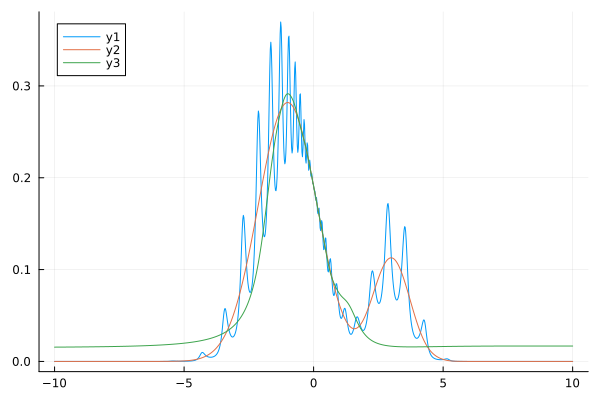

In [11]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(real.(f64_wo_sol.reals.freq), imag.(f64_wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val))/pi)
#plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [16]:
plot(xlim = [-6,6],
    legend = :topright,
#    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt 128bit",lw=3)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val)/pi),label="opt 64bit",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak_64.svg")

"/home/kosuke/work/Nevanlinna_f/notebooks/two_peak_64.svg"